<a href="https://colab.research.google.com/github/Olga225/ITMO_Statistics_and_ML/blob/main/%D0%9B%D0%A0_PCA_%26_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**

1. Для двух главных компонент $w_1, w_2$ функция потерь будет иметь вид:

\begin{equation}
  \begin{aligned}
Loss(W) &= \frac{1}{n}\sum^n_{i=1}||x_i - (z_{i1}w_1 + z_{i2}w_2)||^2 = \\
&= \frac{1}{n}\sum^n_{i=1}((x_i - (z_{i1}w_1 + z_{i2}w_2))^T(x_i - (z_{i1}w_1 + z_{i2}w_2))) = \\
&= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - x_i^T(z_{i1}w_1 + z_{i2}w_2) - (z_{i1}w_1 + z_{i2}w_2)^Tx_i + (z_{i1}w_1 + z_{i2}w_2)^T(z_{i1}w_1 + z_{i2}w_2)) = \\
&= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2 + z_{i2}^2)
  \end{aligned}
\end{equation}



2. Нам необходимо минимизировать функцию потерь $Loss(W) → min$. Найдем экстремум:

$\frac{\partial Loss}{\partial z_{i1}} = \frac{1}{n} (2x_{i1} - 2x_i^Tw_1) = 0 ⇒ z_{i1} = x_i^Tw_1$.

$\frac{\partial Loss}{\partial z_{i2}} = \frac{1}{n} (2x_{i2} - 2x_i^Tw_2) = 0 ⇒ z_{i2} = x_i^Tw_2$.

Т.е. счеты $z_i$ - это проекции исходных данных $X$ на соответствующие векторы $w_1, w_2$.

3. Подставим результаты шага 2 в функцию потерь.

\begin{equation}
  \begin{aligned}
Loss(W) &= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - 2x_i^Tw_1x_i^Tw_1 - 2x_i^Tw_2x_i^Tw2 + x_i^Tw_1x_i^Tw_1 + x_i^Tw_2x_i^Tw_2) = \\
&= const - \frac{1}{n}\sum^n_{i=1}(w_1^Tx_ix_i^Tw_1 + w_2^Tx_ix_i^Tw_2) = \\
&= const - (w_1^Tcov(x)w_1 + w_2^Tcov(x)w_2)
  \end{aligned}
\end{equation}

Минимизируем функцию потерь по методу Лагранжа:

$\frac{\partial LagLoss}{\partial w_1} = -2cov(x)w_1 + 2λ_1w_1 = 0 ⇒ cov(x)w_1 = \lambda_1w_1$

$\frac{\partial LagLoss}{\partial w_2} = -2cov(x)w_2 + 2λ_2w_2 = 0 ⇒ cov(x)w_2 = \lambda_2w_2$

Т.е. $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы.

4. Тогда по итогам шага 3, $λ_i = \frac{1}{n}\sum^n_{i=1}(x_ix_i^Tw_iw_i^T) = \frac{1}{n}\sum^n_{i=1}(w_i(x_ix_i^Tw_i)^T) = \frac{1}{n}\sum^n_{i=1}(w_i(x_i^Tw_i)^Tx_i^T) = \frac{1}{n}\sum^n_{i=1}(z_i^2) = S^2z_i$.

Т.е. полученные собственные числа $\lambda_i$ представляют собой значение выборочных дисперсий соответствующих (новых) координат.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Ваше решение:** Пусть $X$ - матрица рамзера $(n, n)$. Возьмем матрицу $A = XX^T$. Она симметрична, т.к. $A^T = (XX^T)^T = (X^T)^TX^T = XX^T = A$.

Взьмем в $\mathbb R^n$ некоторый ортонормальный базис $v$. По спектральной теореме, в $\mathbb R^n$ есть ортонормированный базис $u$ из собственных векторов $A$. $A$ задает в $\mathbb R^n$ симметричное преобразование. Приведем это к базису $u$ с помощью матрицы перехода $U$: $\mathbb A = U^{-1}AU$. Т.к. мы работаем в базисе, составленном из собственных чисел матрицы, то матрица $\Lambda = U^{-1}AU$ диагональна.

Т.к. матрица перехода между двумя ортонормированными векторами ортогональна, $U^{-1} = U^T$. Тогда, $\Lambda = U^TAU = U^TXX^TU$.



Домножением на соответствующие матрицы обоих частей равенства, получим:

$UU^TXX^TU = U\Lambda ⇒ XX^TU = UΛ$.

$X^TXX^TU = X^TUΛ ⇒ (X^TX)(X^TU) = X^TUΛ$.

По определению собственных чисел и векторов, $X^TU$ - это матрица, составленная из собственных векторов $XX^T$, а $Λ$ - матрица ее собственных чисел.

Матрица $X^TU$ ортогональна, так как состоит из собственных векторов симметричной матрицы $XX^T$, которые ортогональны по спектральной теореме. Однако нормы этих векторов $||v_i|| = \sqrt{(X^Tu_i)^T(X^Tu_i)} = \sqrt{u_i^TXX^Tu_i} = \sqrt{\lambda_iu_i^Tu_i} = \sqrt{λ_i}$, т.е. не обязаны равняться 1.

In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import random

In [ ]:
A = list(range(-10, 11))

# Строим случайную матрицу 3 x 3
X = np.array([random.choices(A, k=3),
              random.choices(A, k=3),
              random.choices(A, k=3)])

print('X = \n', X)

# Симметричная матрица A = XX^T
A = X @ X.T
print('A = \n', A)

# Найдем собственные числа и вектора
eigenvalues, U = np.linalg.eig(A)
print('U = \n', U)

# Проверим ортогональность U (матрица X такая что XX^T = I)
print('Матрица U ортогональна: ', np.allclose(U.T @ U, np.eye(3)))

# Проверим существование диагональной матрицы по заданной формуле:
L = U.T @ X @ X.T @ U
print('Диагональная матрица L: \n', (L).round(5))

X = 
 [[-7 -2  1]
 [ 4  8 10]
 [ 0 -8 -1]]
A = 
 [[ 54 -34  15]
 [-34 180 -74]
 [ 15 -74  65]]
U = 
 [[ 0.213 -0.974  0.082]
 [-0.878 -0.154  0.453]
 [ 0.428  0.168  0.888]]
Матрица U ортогональна:  True
Диагональная матрица L: 
 [[224.31   -0.     -0.   ]
 [  0.     46.024   0.   ]
 [ -0.     -0.     28.666]]


In [ ]:
# Покажем верность равенства XX^TU = UL
print('XX^TU = UL: ', np.allclose(X @ X.T @ U, U @ L))

# Покажем верность равенства X^TXX^TU = X^TUL
print('X^TXX^TU = X^TUL: ', np.allclose(X.T @ X @ X.T @ U, X.T @ U @ L))

# Покажем верность равенства (X^TX)(X^TU) = X^TUL
print('(X^TX)(X^TU) = X^TUL: ', np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ L))

XX^TU = UL:  True
X^TXX^TU = X^TUL:  True
(X^TX)(X^TU) = X^TUL:  True


In [ ]:
# Покажем, что столбцы матрицы  X^TU  ортогональны, но не ортонормированы.
XTU = X.T @ U

print(XTU)

ort_flag = True
norm_flag = True
for i in range (0, 3):
  for j in range (0, 3):
    vec_c = XTU.T[i] @ XTU.T[j]
    if i != j:
      ort_flag = (round(vec_c, 5) == 0)
    else:
      norm_flag = (round(vec_c, 5) == 1)

print('Матрица X^TU ортогональна: ', ort_flag)
print('Матрица X^TU ортонормирована: ', norm_flag)

[[ -5.004   6.198   1.239]
 [-10.877  -0.631  -3.647]
 [ -8.998  -2.684   3.719]]
Матрица X^TU ортогональна:  True
Матрица X^TU ортонормирована:  False


In [ ]:
# Получим нормы столбцов X^TU и приведем преобразование к ортогональному.
ort_XTU = np.empty((3, 3))
for i in range (0, 3):
  norm_vec = np.linalg.norm(XTU.T[i])
  ort_XTU[i] = (XTU.T[i] / norm_vec)

otr_XTU = ort_XTU.T

print('X^TU после нормировки :\n', ort_XTU.T)
print('Матрица X^TU ортонормирована: ', np.allclose(ort_XTU.T @ ort_XTU, np.eye(3)))


X^TU после нормировки :
 [[-0.334  0.914  0.231]
 [-0.726 -0.093 -0.681]
 [-0.601 -0.396  0.695]]
Матрица X^TU ортонормирована:  True


In [ ]:
# Здесь полученное X^TU - матрица векторов главных компонент. Следовательно, чтобы получить координаты объектов:

Z = X @ otr_XTU
print('Z - матрица новых координат объектов: \n', Z)

Z - матрица новых координат объектов: 
 [[  3.191  -6.605   0.437]
 [-13.154  -1.047   2.423]
 [  6.411   1.14    4.754]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

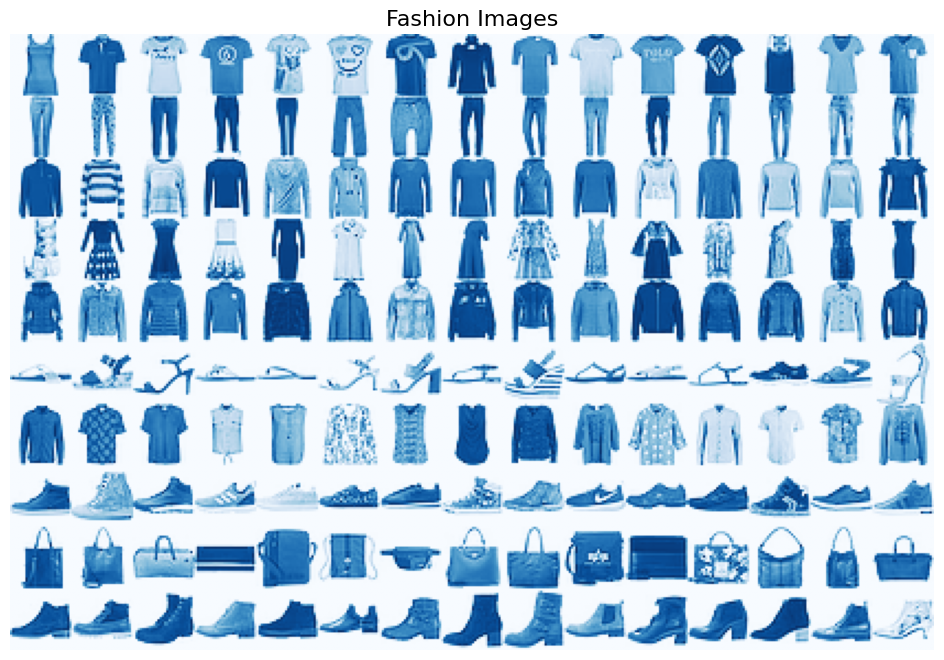

In [4]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [5]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(max_iter=2000, tol=0.001, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('f1-score = ', f1_score(y_test, y_pred, average='weighted'))

f1-score =  0.7381424298005053


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

F1-score - это мера оценки качества моделей классификации, являющаяся гармоническим средним точности и полноты. Оно вычисляется по формуле:

$F_1 score = \frac{2TP}{2TP + FP + FN}$, где

$TP$ - истинно положительный результат,
$FP$ - ложно положительный результат,
$FN$ - ложно отрицательный результат.

Точноть вычисляется как $\frac{TP}{TP + FP}$ - доля верно определенных среди всех признанных положительными, полнота как $\frac{TP}{TP + FN}$ - доля верно определенных среди всех реально положительных.

Данная мера оценки полезна, когда мы хотим учесть и точность, и полноту без "перекоса" в сторону одной из них. Она объединяет обе характеристики, что позволяет удобно сравнивать модели между собой. Кроме того, она хорошо справляется с несбалансированными классами.

С другой стороны, в случаях, когда нам надо учитывать большую ценность точности или плотности, f1-score становиться менее эффективной метрикой сравнения. Кроме того, никак не учитываются истинно отрицательные результаты.

Применяемые параметры:

1. 'binary'. Используется по умолчанию. Применим только для систем двух классов.

2. 'micro'. Считает глобальную материку по всем классам: суммируются TP, FP, FN для всех классов и строиться общее значение f1-score. Используется, когда нам необходимо общая метрика для предсказаний в целом, не отдельно по классам.

3. 'macro'. Считает f1-score для каждого класса отдельно и возвращает среднее значение. Используется, когда все классы важны и нас интересуетт среднее их метрик.

4. 'weighted'. Считает f1-score для каждого класса отдельно и возвращает взвешенное среднее значение (в качестве веса выступает число объектов в классе). Используется, когда классы ожидаются несбалансированными и нас интересует общее значение с учетом размера классов.

5. 'samples'. Считает f1-score для каждого объекта отдельно и возвращает среднее значение. Используется, когда один объект может иметь метки нескольких классов.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

Scale =  50


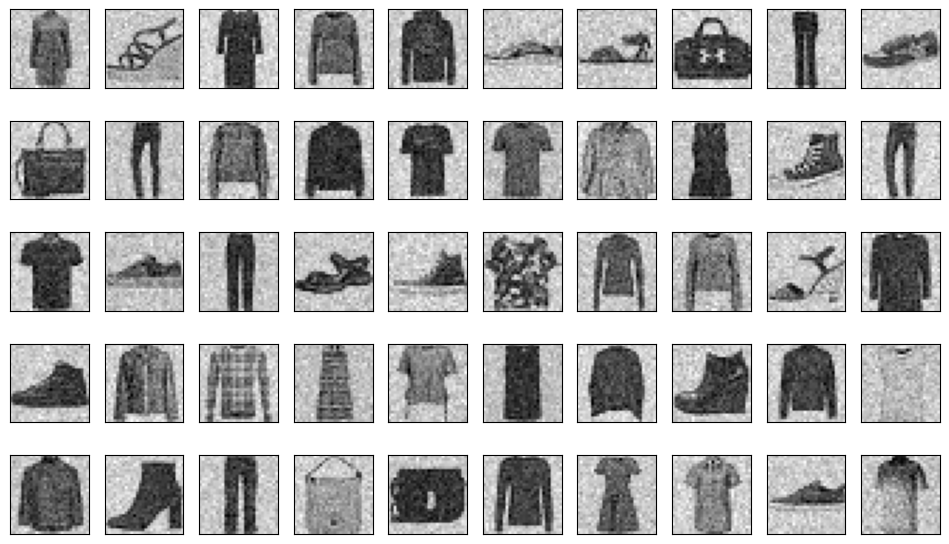

Scale =  100


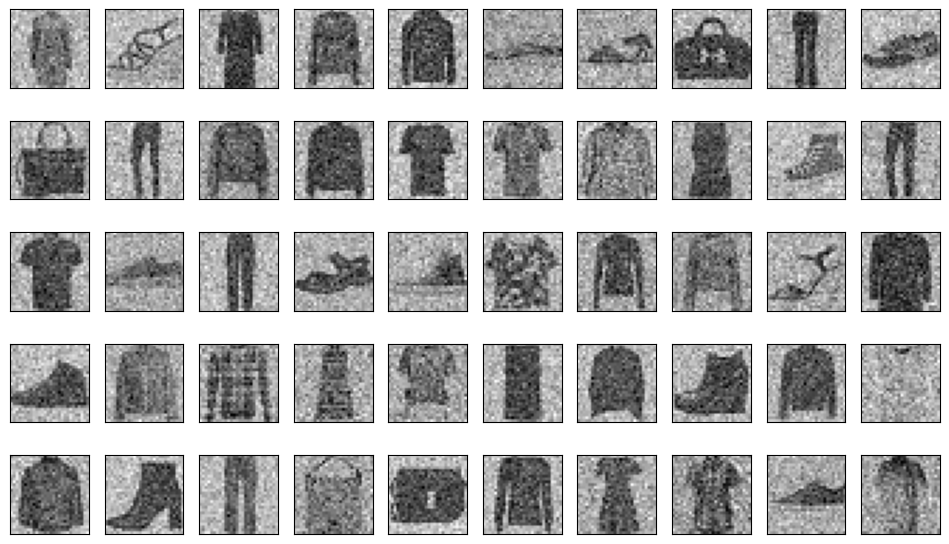

Scale =  150


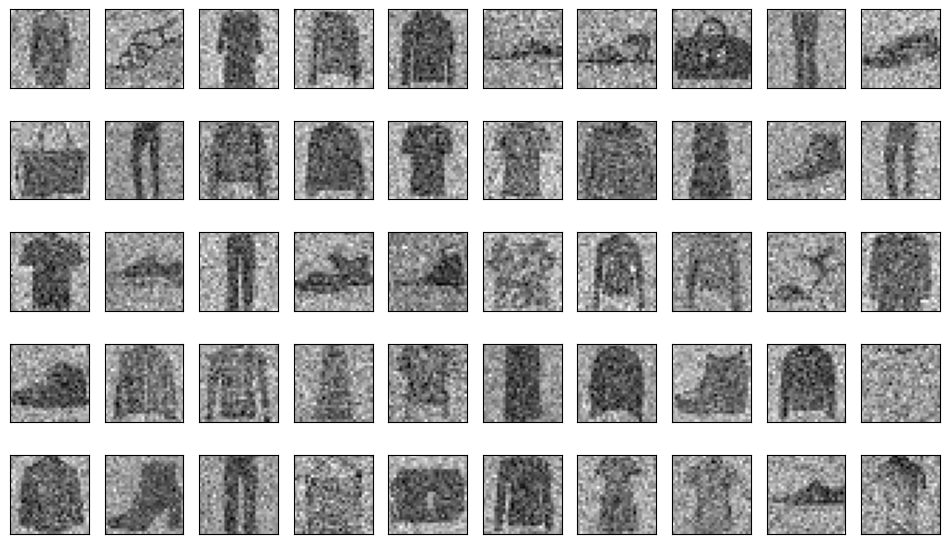

Scale =  200


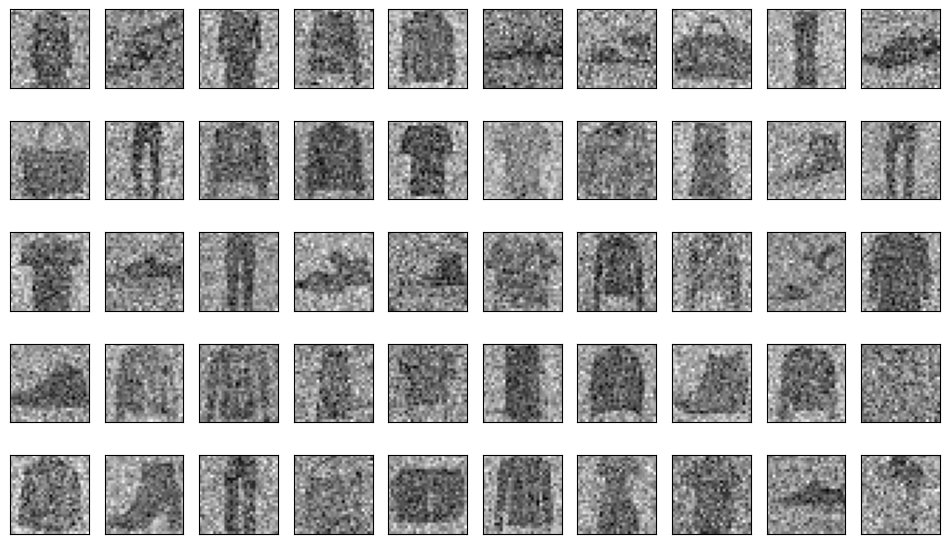

In [10]:
scales = [50, 100, 150, 200]
X_test_noisy_scales = []

for scale in scales:
  print('Scale = ', scale )

  noise = np.random.normal(X_test, scale)
  X_test_noisy = X_test + noise
  X_test_noisy_scales.append(X_test_noisy)

  fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

  for i, ax in enumerate(axes.flat):
      ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
  plt.show()

**Ваши выводы:** чем большее стандартное отклонение (scale) мы используем, тем сильнее добавляемые данные отклоняются от среднего (X_test), и, как следствие, тем более "зашумленным" становится изображение.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [11]:
f_score_without_PCA = []

for i in range(len(scales)):
  y_pred = clf.predict(X_test_noisy_scales[i])
  f_score = f1_score(y_test, y_pred, average='weighted')
  f_score_without_PCA.append(f_score)
  print(f'For scale = {scales[i]}, f1-score = {f_score}')

For scale = 50, f1-score = 0.6428461516241195
For scale = 100, f1-score = 0.5129406049722829
For scale = 150, f1-score = 0.4343249589382077
For scale = 200, f1-score = 0.38999707355596785


**Ваши выводы:** увеличение зашумленности данных уменьшает f1-score и, как следствие, эффективность классификации, т.к. алгоритму становиться сложнее отличить "ценные" данные, важные для принятия решения, от шума.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

Scale =  50


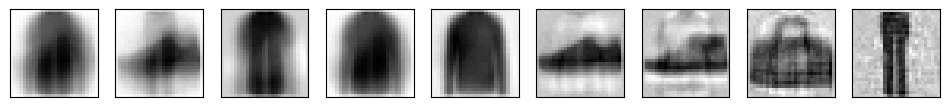

Scale =  100


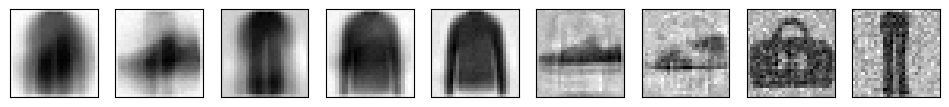

Scale =  150


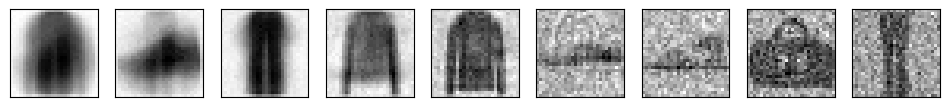

Scale =  200


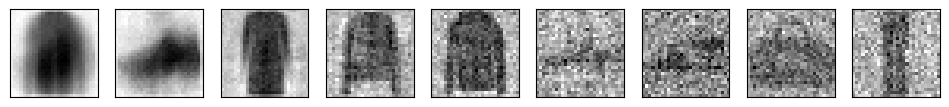

In [17]:
from sklearn.decomposition import PCA
restored_X_test_noisy_scales = []

for s in range(len(scales)):
   print('Scale = ', scales[s])
   restored_X_test_noisy = []

   for explained_variance in range(1, 10, 1):

      pca = PCA(n_components=explained_variance / 10)
      X_reduced = pca.fit_transform(X_test_noisy_scales[s])
      X_restored = pca.inverse_transform(X_reduced)
      restored_X_test_noisy.append(X_restored)

   restored_X_test_noisy_scales.append(restored_X_test_noisy)

   fig, axes = plt.subplots(1, 9, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

   for i, ax in enumerate(axes.flat):
       ax.imshow(restored_X_test_noisy[i % 9][i].reshape(28, 28), cmap=plt.cm.gray_r)
   plt.show()

**Ваши выводы:** PCA успешно снизил зашумленность данных (чем ниже был изначальный уровень шума, тем лучше удалось от него избавиться). Изображения, безусловно, потеряли в качестве по сравнению с изначальными (это особенно заметно для score = 50). Однако, "ценные" данные (точки, отвечающие нашим реальным данным) стали ярче и выраженнее относительно шума.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
f_scores_results = []

for s in range(len(scales)):
  print("For scale = ", scales[s])
  for ev in range(1, 10, 1):
     y_pred = clf.predict(restored_X_test_noisy_scales[s][ev-1])
     f_score = f1_score(y_test, y_pred, average='weighted')
     f_scores_results.append([scales[s], (ev / 10), f_score])
     print(f'For explained varience = {ev / 10}, f1-score = {f_score}')

For scale =  50
For explained varience = 0.1, f1-score = 0.0687402165011827
For explained varience = 0.2, f1-score = 0.0687402165011827
For explained varience = 0.3, f1-score = 0.20682781765280678
For explained varience = 0.4, f1-score = 0.20682781765280678
For explained varience = 0.5, f1-score = 0.46857396952685226
For explained varience = 0.6, f1-score = 0.6018829872122946
For explained varience = 0.7, f1-score = 0.6949614257738091
For explained varience = 0.8, f1-score = 0.7620086883480617
For explained varience = 0.9, f1-score = 0.7238244232569004
For scale =  100
For explained varience = 0.1, f1-score = 0.0679399856329058
For explained varience = 0.2, f1-score = 0.0679399856329058
For explained varience = 0.3, f1-score = 0.18703464924795957
For explained varience = 0.4, f1-score = 0.4522524144129842
For explained varience = 0.5, f1-score = 0.6452227581727376
For explained varience = 0.6, f1-score = 0.7124604959853164
For explained varience = 0.7, f1-score = 0.6816702376732227
For

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

In [ ]:
print(f_scores_results)

[[50, 0.1, 0.0687402165011827], [50, 0.2, 0.0687402165011827], [50, 0.3, 0.20682781765280678], [50, 0.4, 0.20682781765280678], [50, 0.5, 0.46857396952685226], [50, 0.6, 0.6018829872122946], [50, 0.7, 0.6949614257738091], [50, 0.8, 0.7620086883480617], [50, 0.9, 0.7238244232569004], [100, 0.1, 0.0679399856329058], [100, 0.2, 0.0679399856329058], [100, 0.3, 0.18703464924795957], [100, 0.4, 0.4522524144129842], [100, 0.5, 0.6452227581727376], [100, 0.6, 0.7124604959853164], [100, 0.7, 0.6816702376732227], [100, 0.8, 0.6049549214905542], [100, 0.9, 0.5756633669949005], [150, 0.1, 0.05715120125981296], [150, 0.2, 0.2002006696011063], [150, 0.3, 0.5353012461088824], [150, 0.4, 0.675673071774565], [150, 0.5, 0.6365668340387076], [150, 0.6, 0.5704970780387786], [150, 0.7, 0.5323347547930811], [150, 0.8, 0.49973694577191713], [150, 0.9, 0.47356318056260704], [200, 0.1, 0.06825023438492137], [200, 0.2, 0.46329564714724836], [200, 0.3, 0.6319902096307561], [200, 0.4, 0.5722428205664538], [200, 0.

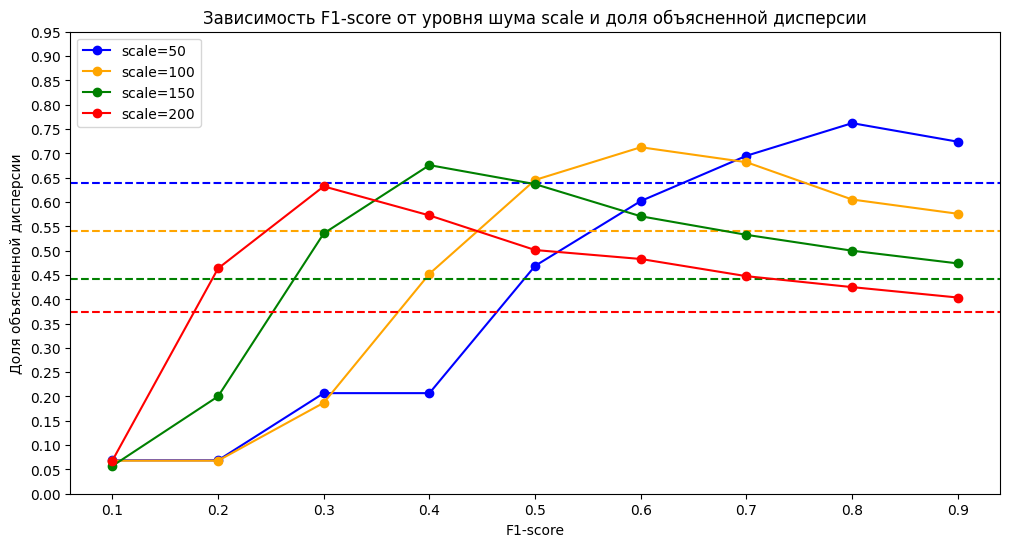

In [ ]:
import pandas as pd

plt.figure(figsize=(12, 6))
df = pd.DataFrame(f_scores_results, columns=['scale', 'ev', 'f_score'])
colors = ['blue', 'orange', 'green', 'red']

for scale in df['scale'].unique():
    i = scale // 50 - 1
    subset = df[df['scale'] == scale]
    plt.plot(subset['ev'], subset['f_score'],
             marker='o', label=f'scale={scale}', color = colors[i])

    plt.axhline(y=f_score_without_PCA[scale // 50 - 1], linestyle='--', color = colors[i])

    plt.legend()
    plt.yticks(np.arange(0, 1, 0.05))
    plt.title('Зависимость F1-score от уровня шума scale и доля объясненной дисперсии')
    plt.xlabel('F1-score')
    plt.ylabel('Доля объясненной дисперсии')
plt.show()

**Ваши выводы:**

Во всех случаях применение PCA позволило получить более высокое значение f1-score. Однако, для разных степеней зашумленности наивысшее значение f1-score достигалось на разных значения доли объясненной дисперсии. Чем выше была зашумленность, тем ниже должна была быть доля объясненной дисперсии.Это можно объяснить тем, что чем точнее мы пытаемся восстановить данные при PCA, тем больше шума мы допускаем обратно в изображение, что особенно критично на высоком зашумлении, где он слабо отличается по интенсивности от реальных данных. При этом низкие (до 0.2) значения доли объясненной дисперсии давали крайне низкий результат f1-score, т.к., вероятно, точности было недостаточно для выосстановления "ценных" данных в достаточном объеме.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

**Для SNE:**
$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} e^{-d_{ij}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{\partial log(e^{-d_{kl}^2})}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
2p_{ij} + \sum\limits_{k \neq l}p_{kl}\frac{1}{Z}\frac{\partial \sum(e^{-d_{kl}^2})}{\partial d_{ij}} =
2p_{ij} - \sum\limits_{k \neq l}p_{kl} \frac{e^{-d_{ij}^2}}{Z} =
2p_{ij} - 2q_{ij} = 2(p_{ij} - q_{ij})
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j(p_{ij} - q_{ij})(y_i - y_j)
$$

**Для T-SNE:**

$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} \frac{1}{1 + d_{kl}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{1}{q_{kl}Z}\frac{\partial \frac{1}{1 + d_{kl}^2}}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
\frac{2p_{ij}}{q_{ij}Z(1 + d_{ij}^2)^2} - 2\sum\limits_{k \neq l}p_{kl}\frac{\frac{1}{(1 + d_{kl}^2)^2}}{Z} =
\frac{2p_{ij}}{(1 + d_{ij}^2)} - 2\frac{q_{ij}}{(1 + d_{ij}^2)} =
2\frac{(p_{ij} - q_{ij})}{(1 + d_{ij}^2)}
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j\frac{(p_{ij} - q_{ij})(y_i - y_j)}{1 + ||y_i - y_j||^2}
$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [18]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

In [ ]:
import pandas as pd
import numpy as np

k = 10
n_dimensions = 2

In [ ]:
# Вычисляем попарную близость (pairwise affinities).
# На вход принимается данные в формате np.array и perplexity (по умолчанию 30)
# Возвращается np.array - массив значений p_i|j

def compute_pairwise_affinities(X, k = 30):
  n = len(X)
  pair_affs = np.zeros((n, n)) # близость i-ой точки к j-ой в многомерном пространстве
  diffs = np.zeros((n, n)) # расстояния между точками в многомерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      if i != j:
        diffs[i, j] = np.linalg.norm(X[i] - X[j])
      else:
        diffs[i, j] = np.inf

  # Вероятности как p_i|j = 1/k для k ближайших соседей; 0 для остальных
  for i in range(n):
    closest_indices = np.argsort(diffs[i])[:k]
    pair_affs[i, closest_indices] = 1.0 / k

  return pair_affs


pair_affs = compute_pairwise_affinities(np.array(data), 20)
print(pair_affs)

[[0.   0.   0.   ... 0.05 0.   0.05]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.05 0.   0.  ]
 ...
 [0.   0.   0.05 ... 0.   0.   0.  ]
 [0.   0.   0.05 ... 0.05 0.   0.  ]
 [0.05 0.   0.   ... 0.   0.   0.  ]]


In [ ]:
# Вычисляем совместную вероятность p_ij
# На вход принимается массив попарных близостей P_i|j в формате np.array
# Возвращается массив совместных вероятностей p_ij в формате np.array

def set_pij(pair_affs):
  n = pair_affs.shape[0]
  p_ij = np.zeros(shape = pair_affs.shape)

  for i in range (n):
    for j in range (n):
      p_ij[i, j] = (pair_affs[i, j] + pair_affs[j, i]) / (2 * n)

  return p_ij

p_ij = set_pij(pair_affs)
print(p_ij)

[[0.         0.         0.         ... 0.00041667 0.         0.00083333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00083333 0.00041667 0.        ]
 ...
 [0.00041667 0.         0.00083333 ... 0.         0.00041667 0.        ]
 [0.         0.         0.00041667 ... 0.00041667 0.         0.        ]
 [0.00083333 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Инициализируем начальное решение y
# На вход принимает число объектов n и число измерений n_dimensions (по умолчанию 2)
# Возвращает массив случайных значений y

def initialize_y(n, n_dimensions = 2):
  return np.random.normal(0,scale=1e-2,size=(len(X),n_dimensions))

initial_y = initialize_y(X.shape[0])
print(initial_y[:7])


[[-0.01109575 -0.012375  ]
 [ 0.00453033 -0.00334799]
 [ 0.00164036  0.00336009]
 [ 0.00812889 -0.00976502]
 [ 0.01429449  0.0039693 ]
 [ 0.01123796 -0.007762  ]
 [-0.00713501  0.00149888]]


In [ ]:
# Вычисляем близости q_ij в маломерном пространстве
# На вход принимается массив точек в Y как Np.array и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Возвращает массив близостей q_ij

def compute_low_dim_affinities(Y, SNE_method = 'T-SNE'):
  n = len(Y)
  q_ij = np.zeros((n, n)) # близость i-ой точки к j-ой в маломерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      diff = np.linalg.norm(Y[i] - Y[j])

      if SNE_method == 'SNE':
        q_ij[i, j] = np.exp(-(diff ** 2))
      if SNE_method == 'T-SNE':
        q_ij[i, j] = 1.0 / (1 + (diff ** 2))

  np.fill_diagonal(q_ij, 0)
  q_ij = q_ij / q_ij.sum()

  return q_ij

q_ij = compute_low_dim_affinities(initial_y)
print(q_ij)

[[0.         0.00028253 0.00028251 ... 0.00028247 0.0002826  0.0002825 ]
 [0.00028253 0.         0.00028261 ... 0.00028252 0.00028259 0.00028241]
 [0.00028251 0.00028261 0.         ... 0.00028258 0.00028258 0.00028247]
 ...
 [0.00028247 0.00028252 0.00028258 ... 0.         0.00028254 0.00028256]
 [0.0002826  0.00028259 0.00028258 ... 0.00028254 0.         0.00028251]
 [0.0002825  0.00028241 0.00028247 ... 0.00028256 0.00028251 0.        ]]


In [ ]:
# Вычисляем минимизируемую функцию и градиент
# На вход принимаются массивы p_ij, q_ij, Y и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Вовзращает значение KL и градиент как одномерный массив

def compute_KL_and_gradient(Y, p_ij, method = 'T-SNE'):
  n = len(p_ij)
  Y = Y.reshape(n, 2)
  m = Y.shape[1]

  q_ij = compute_low_dim_affinities(Y)


  gradient = np.zeros((n, m))

  KL = np.sum(p_ij * np.log((p_ij + 10 ** (-22)) / (q_ij + 10 ** (-22))))

  for i in range(n):
    grad_i = np.zeros(m)
    for j in range(n):
      if i != j:
        if method == 'SNE':
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j])

        if method == 'T-SNE':
          d_ij = (np.linalg.norm(Y[i] - Y[j]))**2
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j]) * ((1 + d_ij) ** (-1))

        grad_i += grad_ij

    gradient[i] = grad_i

  return KL, gradient.ravel()

KL, gradient = compute_KL_and_gradient(initial_y.ravel(), p_ij)
print(KL)
print(gradient[:7])


0.9235354155479383
[ 2.57697381e-04  1.24407755e-04  5.37486556e-05  2.50229482e-04
 -1.80391852e-04 -1.43691657e-04 -5.96091201e-05]


In [ ]:
from scipy.optimize import minimize

def minimize_gradient(p_ij, method, initial_y):
  return minimize(compute_KL_and_gradient, initial_y.ravel(), args=(p_ij, method,), jac=True)

result = minimize_gradient(p_ij, 'T-SNE', initial_y)
print(result)
result = result.x.reshape(initial_y.shape[0], 2)
print(result[:7])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.2655522974819067
        x: [-2.612e+00  1.779e+00 ... -2.363e+00  2.203e+00]
      nit: 516
      jac: [-3.048e-06 -4.294e-06 ...  4.437e-07 -1.507e-06]
 hess_inv: [[ 2.280e+02 -1.389e+02 ...  1.276e-01 -1.874e+01]
            [-1.389e+02  5.815e+02 ...  1.014e+01  1.751e+01]
            ...
            [ 1.276e-01  1.014e+01 ...  2.926e+02  5.171e+01]
            [-1.874e+01  1.751e+01 ...  5.171e+01  2.063e+02]]
     nfev: 531
     njev: 531
[[-2.6118101   1.77947938]
 [ 0.91240996 -3.02277522]
 [ 0.44250025  0.77911175]
 [ 0.42629402  0.72347628]
 [ 1.52463237 -0.04255678]
 [-2.6165912   1.79481071]
 [-0.06776069  0.86064647]]


In [ ]:
def custom_SNE_TSNE(k, method):
  X = np.array(data)
  # Найдем p_i|j
  pair_affs = compute_pairwise_affinities(np.array(data), k)
  # Найдем p_ij
  p_ij = set_pij(pair_affs)
  # Зададим начальное положение Y
  initial_y = initialize_y(X.shape[0])
  # Минимизируем функцию и найдем результат
  result = minimize_gradient(p_ij, method, initial_y)
  result = result.x.reshape(initial_y.shape[0], 2)

  return result

In [ ]:
import time
SNE_TSNE_results = []

for method in ['SNE', 'T-SNE']:
  for k in [5, 20, 30, 50]:
    start_time = time.time()
    res = custom_SNE_TSNE(k, method)
    end_time = time.time()
    execution_time = end_time - start_time
    SNE_TSNE_results.append([method, k, execution_time, res])

<Figure size 1200x600 with 0 Axes>

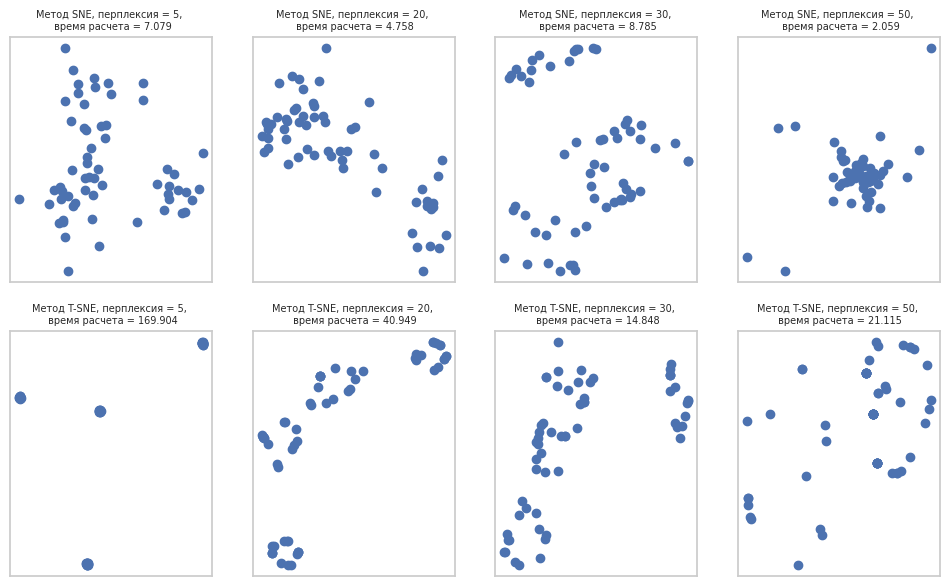

In [ ]:
import pandas as pd

plt.figure(figsize=(12, 6))
df = pd.DataFrame(SNE_TSNE_results, columns=['method', 'k', 'execution_time', 'result'])

fig, axes = plt.subplots(2, 4, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  r = SNE_TSNE_results[i]
  ax.scatter(r[3][:, 0], r[3][:, 1])
  ax.set_title(f'Метод {r[0]}, перплексия = {r[1]}, \n время расчета = {round(r[2], 3)}', fontdict = {'fontsize' : 7} )
plt.show()

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [19]:
!pip install -q openTSNE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from openTSNE import TSNE as openTSNE
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import time
import seaborn as sns
sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.2 MB/s eta 0:00:00


In [20]:
X = np.array(data)

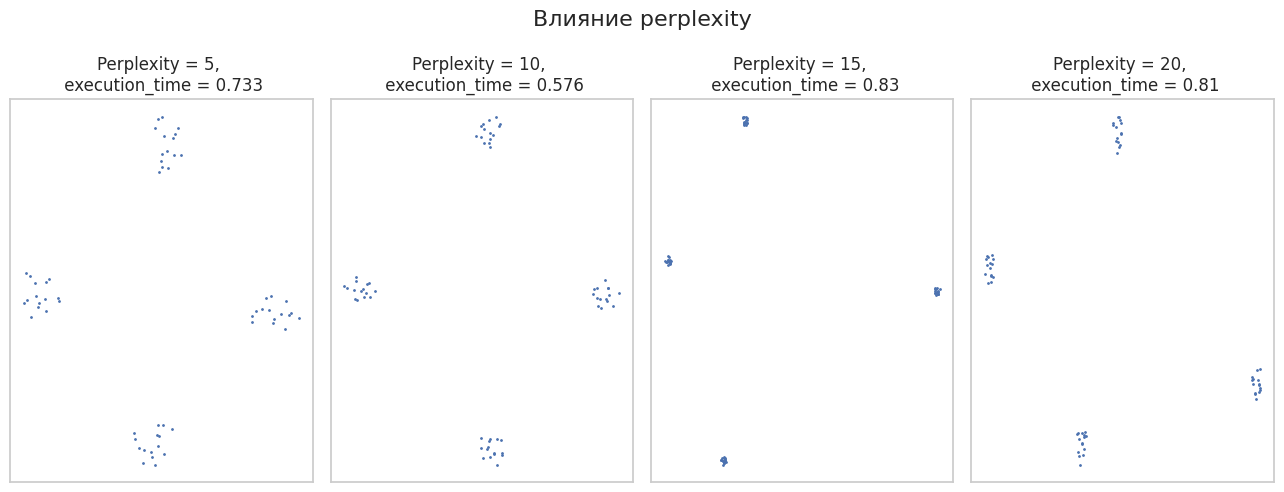

In [32]:
def experiment_perplexity(X, perplexities):
    #perplexities = [5, 10, 15, 20]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, perplexity in enumerate(perplexities):
      start_time = time.time()
      tsne = openTSNE(
            n_components=2,
            perplexity=perplexity,
            random_state=42)

      X_embedded = tsne.fit(X)
      X_embedded = X_embedded.transform(X)
      end_time = time.time()
      execution_time = end_time - start_time

      axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
      axes[i].set_title(f'Perplexity = {perplexity}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние perplexity', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_perplexity(X, [5, 10, 15, 20])


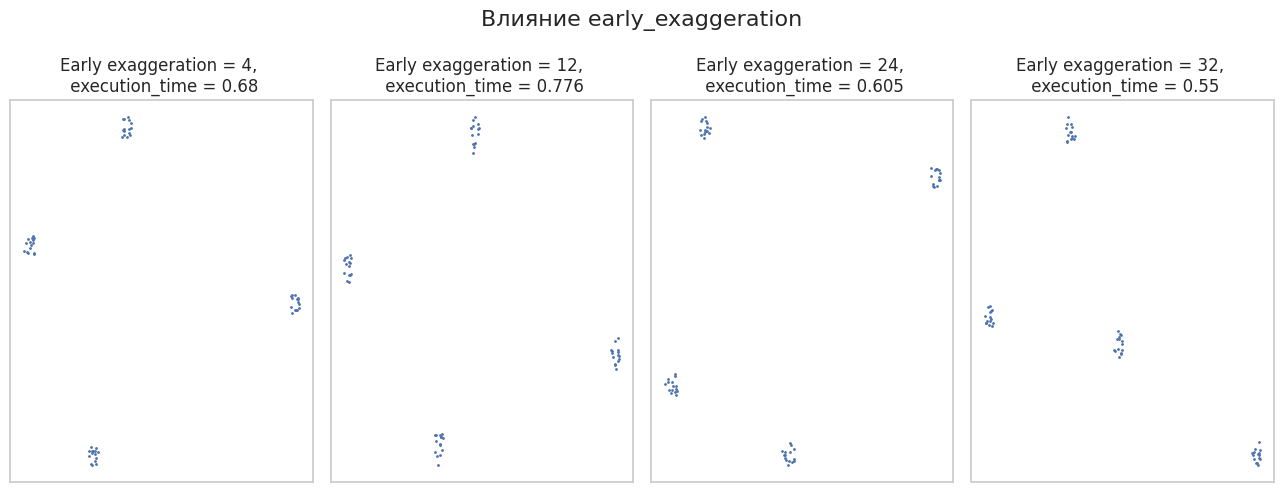

In [34]:
def experiment_early_exaggeration(X, early_exaggerations):
    #early_exaggerations = [4, 12, 24, 32]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, early_ex in enumerate(early_exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            early_exaggeration=early_ex,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Early exaggeration = {early_ex}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние early_exaggeration', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_early_exaggeration(X, [4, 12, 24, 32])

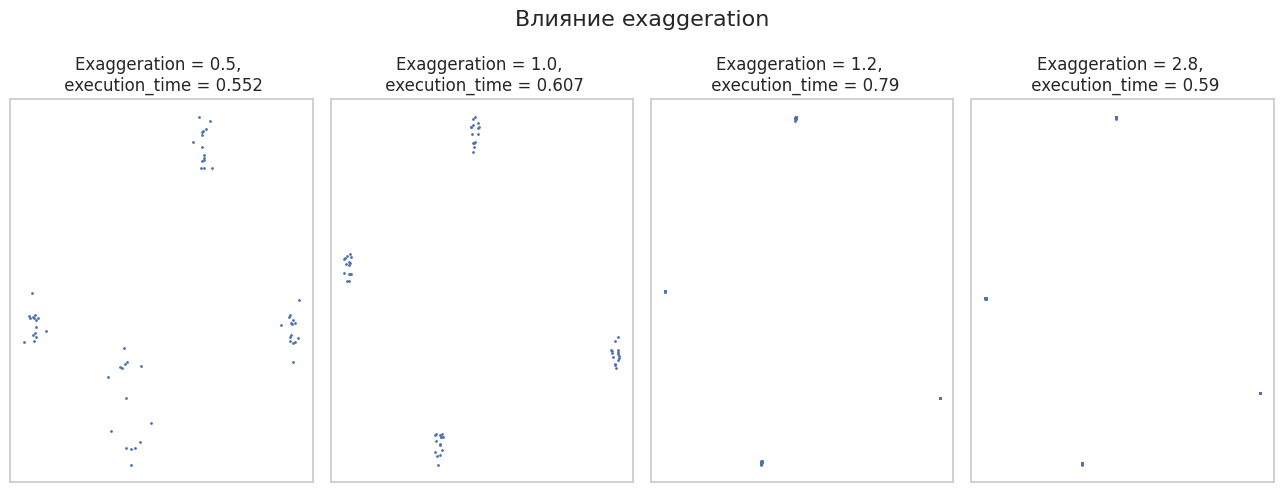

In [35]:
def experiment_exaggeration(X, exaggerations):
    #exaggerations = [0.5, 1.0, 1.2, 2.8]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, exaggeration in enumerate(exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            exaggeration=exaggeration,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Exaggeration = {exaggeration}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние exaggeration', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_exaggeration(X, [0.5, 1.0, 1.2, 2.8])

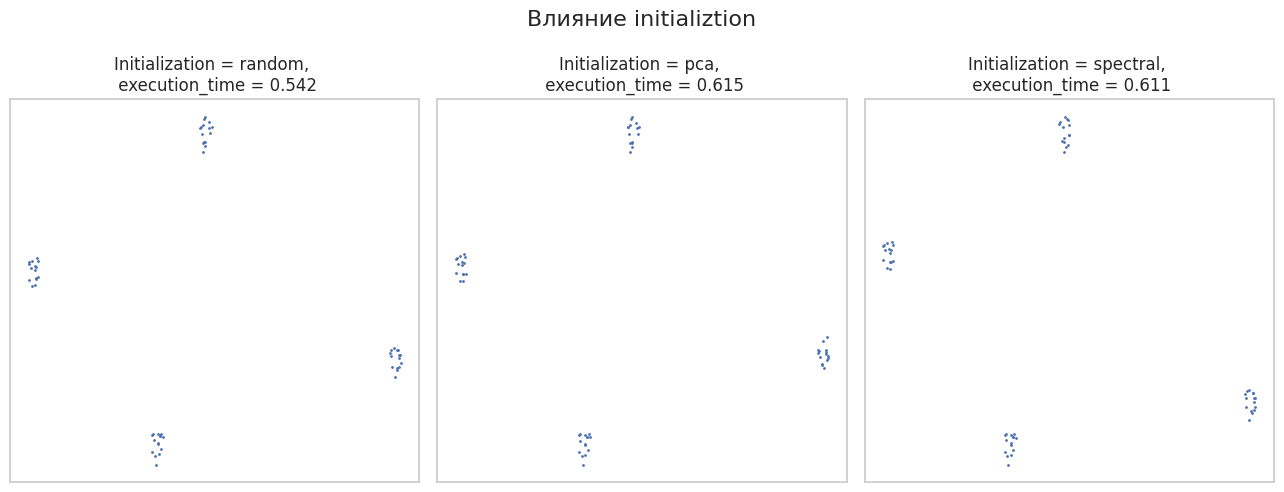

In [36]:
def experiment_initialization(X):
    initializations = ['random', 'pca', 'spectral']

    fig, axes = plt.subplots(1, 3, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, init in enumerate(initializations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            initialization = init
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Initialization = {init}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние initializtion', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_initialization(X)

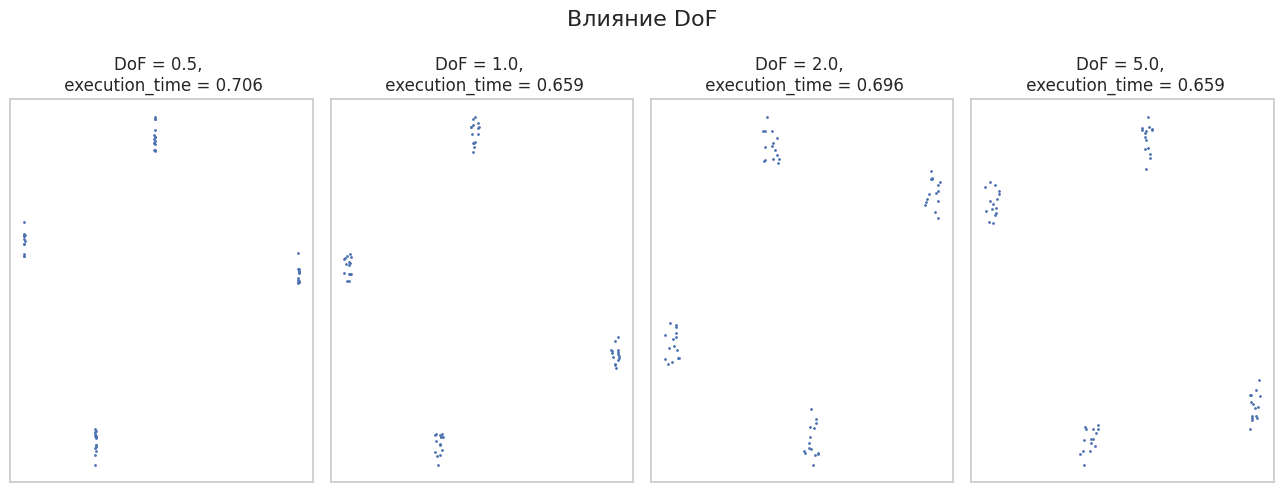

In [37]:
def experiment_dof(X, dofs):
    #dofs = [0.5, 1.0, 2.0, 5.0]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, dof in enumerate(dofs):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            dof = dof
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'DoF = {dof}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние DoF', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_dof(X, [0.5, 1.0, 2.0, 5.0])

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow.keras.datasets import mnist

(60000, 28, 28)


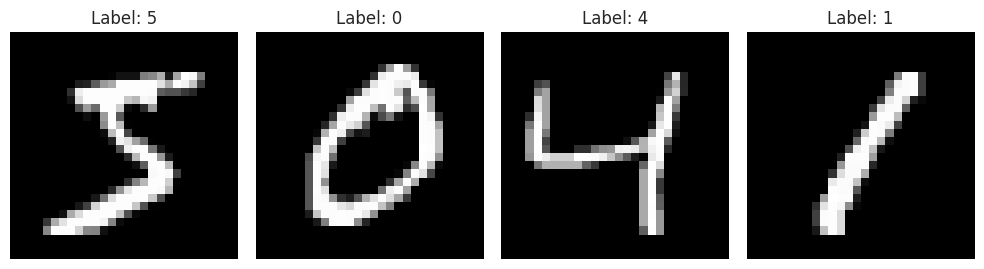

In [29]:
(X_big_dataset, y_big_dataset), (_, _) = mnist.load_data()
print(X_big_dataset.shape)

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_big_dataset[i], cmap='gray')
    plt.title(f"Label: {y_big_dataset[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

X_big_dataset = X_big_dataset.reshape(X_big_dataset.shape[0], -1)


N_SAMPLES = 3000
indices = np.random.choice(X_big_dataset.shape[0], N_SAMPLES, replace=False)
X_sub = X_big_dataset[indices]
y_sub = X_big_dataset[indices]


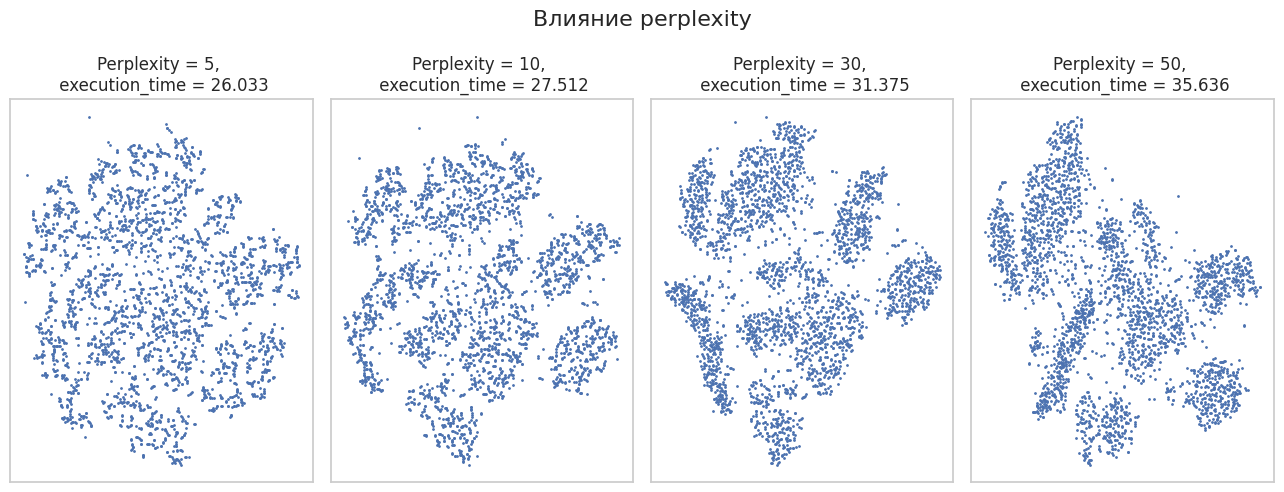

In [38]:
perplexities = [5, 10, 30, 50]

experiment_perplexity(X_sub, perplexities)

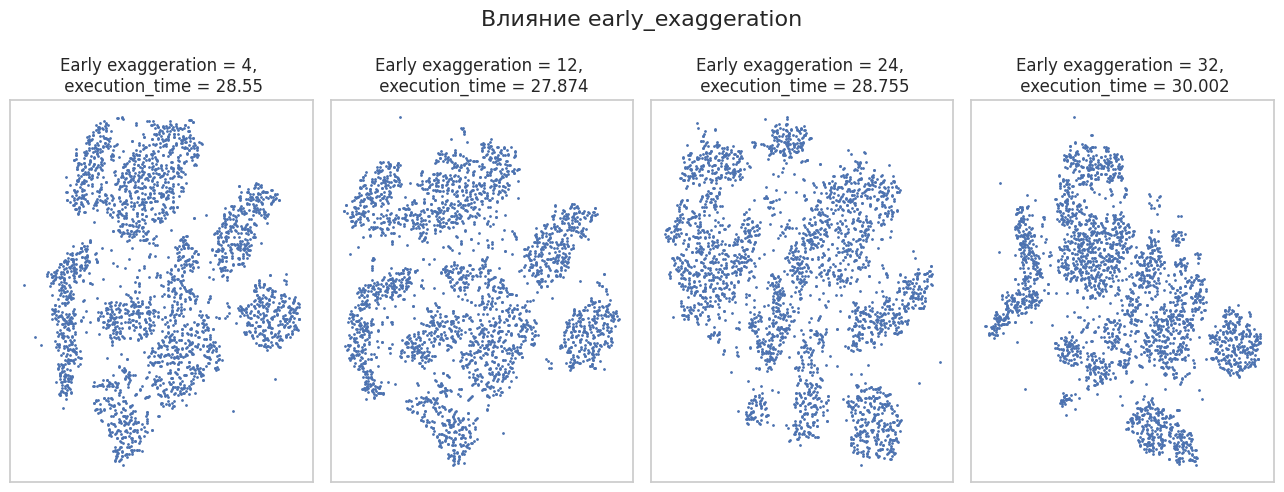

In [39]:
experiment_early_exaggeration(X_sub, [4, 12, 24, 32])

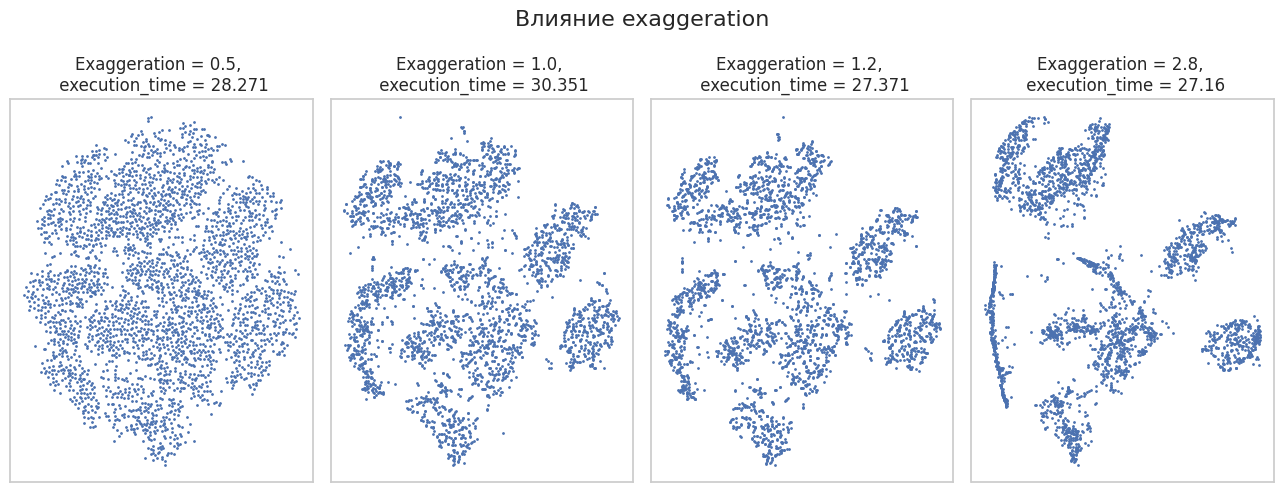

In [40]:
experiment_exaggeration(X_sub, [0.5, 1.0, 1.2, 2.8])

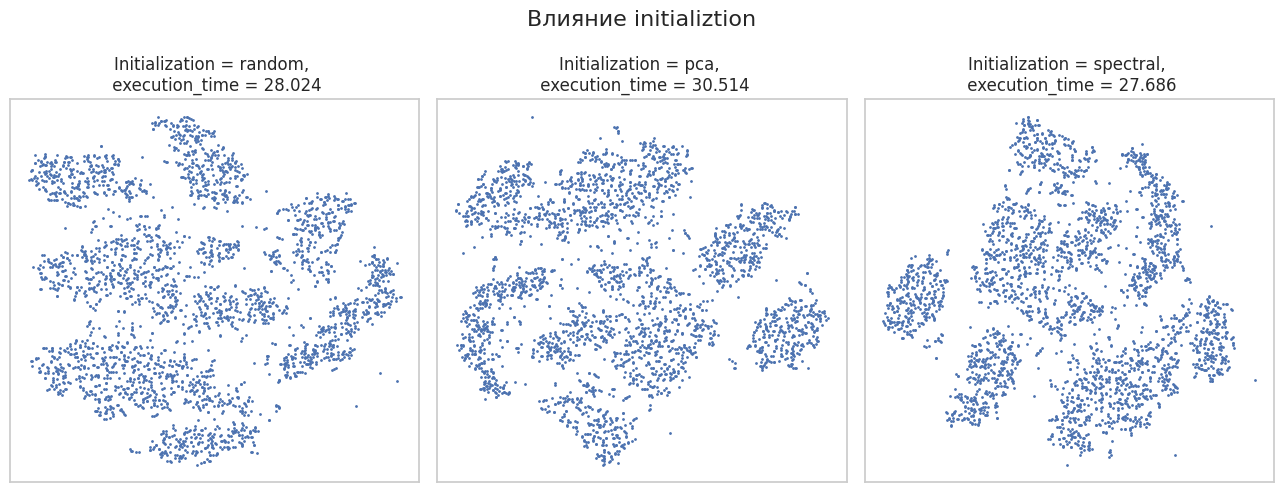

In [41]:
experiment_initialization(X_sub)

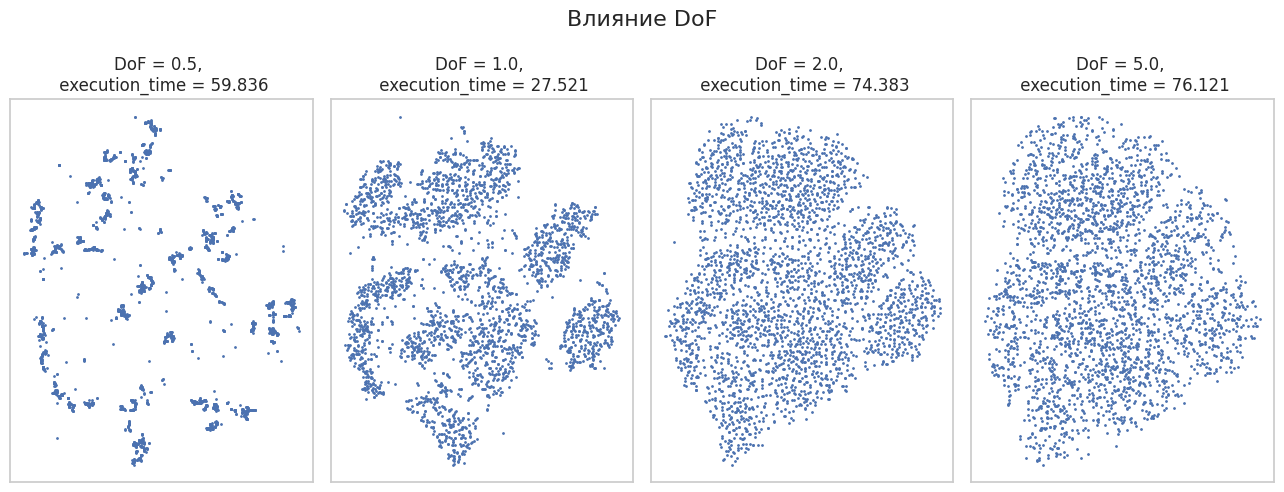

In [42]:
experiment_dof(X_sub, [0.5, 1.0, 2.0, 5.0])